In [1]:
import matplotlib.pyplot as plot
import numpy as np
from scipy.integrate import quad
from sympy import symbols, diff

In [2]:
class Solution:
    def __init__(self, function, number_of_figures, left_border, right_border):
        self.function = function
        self.function_for_derivative = function
        self.n = number_of_figures
        self.a = float(self.get_norm(left_border))
        self.b = float(self.get_norm(right_border))
        self.delta_x = (self.b - self.a) / number_of_figures
        self.arguments = []
        r, l = self.a, self.b
        while r <= l:
            self.arguments.append(r)
            r += self.delta_x
        # print(self.arguments)
        self.values = []
        self.function = self.to_program(function)

    def get_norm(self, a):
        if 'pi' in a:
            a = a.replace('pi', 'np.pi')
        if 'e' in a:
            a = a.replace('e', 'np.e')
        if '^' in a:
            a = a.replace('^', '**')
        return eval(a, {"np": np})

    def to_program(self, f):
        flag = False
        if f == self.function:
            flag = True
        if '^' in f:
            f = f.replace('^', ' ** ')
            self.function_for_derivative = self.function_for_derivative.replace('^', ' ** ')
        if 'np.e' not in f:
            f = f.replace('e', f'{np.e}')
            self.function_for_derivative = self.function_for_derivative.replace('e', f'{np.e}')
        if 'np.log2' not in f:
            f = f.replace('log2', 'np.log2')
        if 'np.log10' not in f:
            f = f.replace('log10', 'np.log10')
        if 'np.log' not in f:
            f = f.replace('log', 'np.log')
        if 'np.sin' not in f:
            f = f.replace('sin', 'np.sin')
        if 'np.cos' not in f:
            f = f.replace('cos', 'np.cos')
        if 'np.pi' not in f:
            f = f.replace('pi', 'np.pi')
        if flag:
            for i in self.arguments:
                x = i
                self.values.append(eval(f))
        return f

    def calculate_derivative(self, n):
        x = symbols('x')
        der = self.function_for_derivative
        for i in range(n):
            der = diff(der)
        return der

    def trapezoidal(self):
        summ = 0
        for i in range(len(self.arguments)):
            if i == 0 or i == len(self.arguments) - 1:
                summ += self.values[i]
                continue
            summ += 2 * self.values[i]
        summ *= self.delta_x / 2
        print(f'trapezoidal sum: {summ}')
        second_derivative = str(self.calculate_derivative(2))
        M = 0
        if 'x' in second_derivative:
            M = self.arguments[self.values.index(max(self.values))]
        else:
            M = int(second_derivative)
        print(f'Estimated error of trapezoidal sum: {(M*(self.b - self.a)**3) / (12 * self.n ** 2)}\n')
        self.draw_trapezoidal()

    def draw_trapezoidal(self):
        drawing_arguments = []
        r, l = self.a, self.b
        while r <= l:
            drawing_arguments.append(r)
            r += 0.001
        drawing_values = []
        for i in drawing_arguments:
            x = i
            drawing_values.append(eval(self.function))
        plot.plot(drawing_arguments, drawing_values)
        plot.axhline(0, color='black', linewidth=1.2)
        plot.axvline(0, color='black', linewidth=1.2)
        for i in range(len(self.arguments)):
            # print(self.arguments[i], self.values[i])
            # print(self.values[i]/max(self.values))
            if self.values[i] > 0:
                plot.vlines(x=self.arguments[i], ymin=0, ymax=self.values[i], color='r')
            else:
                plot.vlines(x=self.arguments[i], ymin=self.values[i], ymax=0, color='r')
        for i in range(len(self.arguments) - 1):
            plot.plot([self.arguments[i], self.arguments[i+1]], [self.values[i], self.values[i+1]])
        plot.xlabel('X')
        plot.ylabel('Y')
        plot.savefig('traps.jpg')

    def simpson(self):
        summ = 0
        for i in range(len(self.arguments)):
            if i == 0 or i == len(self.arguments) - 1:
                summ += self.values[i]
                continue
            elif i % 2:
                summ += 4 * self.values[i]
            else:
                summ += 2 * self.values[i]
        summ *= self.delta_x / 3
        print(f'Simpsons sum : {summ}')
        fourth_derivative = str(self.calculate_derivative(4))
        M = 0
        if 'x' in fourth_derivative:
            M = self.arguments[self.values.index(max(self.values))]
        else:
            M = int(fourth_derivative)
        print(f'Estimated error of Simpson: {(M * (self.b - self.a) ** 5) / (180 * self.n ** 4)}\n')

    def integral(self):
        print(f'The real integral: {quad(lambda x: eval(self.function), self.a, self.b)[0]}')

trapezoidal sum: 24.28125
Estimated error of trapezoidal sum: 0.28125

Simpsons sum : 24.0
Estimated error of Simpson: 0.0

The real integral: 24.0


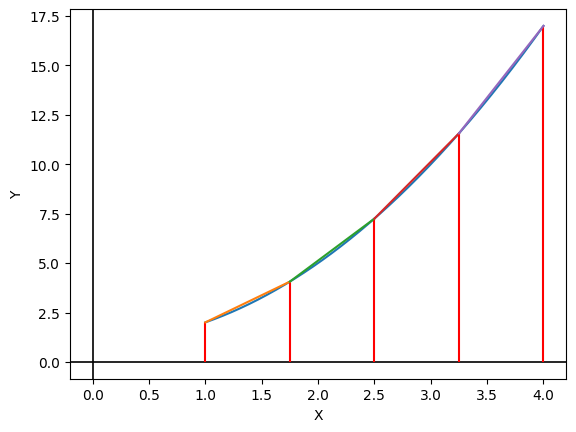

In [6]:
# x^2 + 1 from 1 to 4
solution = Solution(function='x ^ 2 + 1', number_of_figures=4, left_border='1', right_border='4')
solution.trapezoidal()
solution.simpson()
solution.integral()

trapezoidal sum: 1.3528847979326054e-16
Estimated error of trapezoidal sum: 0.507339015802096

Simpsons sum : 1.483234614956509e-16
Estimated error of Simpson: 0.020863480763352957

The real integral: 0.0


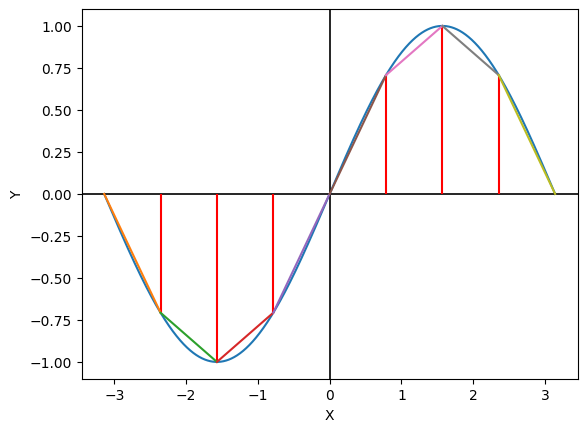

In [10]:
# sin(x) from -pi to pi
solution = Solution(function='sin(x)', number_of_figures=8, left_border='-pi', right_border='pi')
solution.trapezoidal()
solution.simpson()
solution.integral()

trapezoidal sum: 27.132920223694192
Estimated error of trapezoidal sum: 3.2924075180296803

Simpsons sum : 23.633432815204237
Estimated error of Simpson: 0.4710629745616639

The real integral: 23.16297068214698


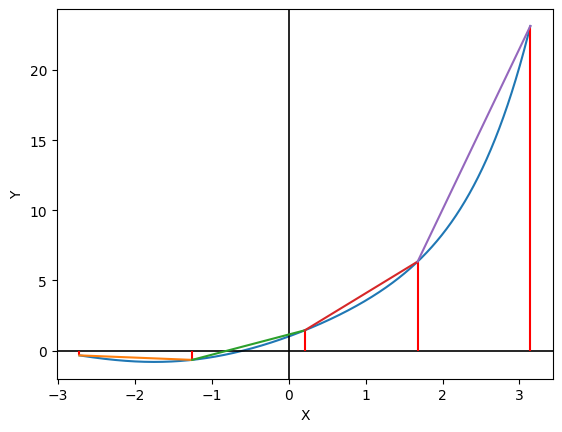

In [9]:
# e ^ x + sin(x) from -e to pi
solution = Solution(function='e ^ x + sin(x)', number_of_figures=4, left_border='-e', right_border='pi')
solution.trapezoidal()
solution.simpson()
solution.integral()